## <span style="color:navy">  Exercise 8 - Variational Monte Carlo </span>

The task of this exercise focuses on computing the ground state of a quantum particle confines in the following potential:

$V(x)= x^{4}-\frac{5}{2}x^{2} $

This problem does not have an exact solution, but the only way is to approximate it numerically. So we use the Variational Monte Carlo, where the trial pdf is sampled by the Metropolis algorithm.

This method is based on the variational principle: it states that for any given wave function $\psi_T$, the variational energy $E_T$ (i.e. normalized mean value of the hamiltonian on this state) is always greater than the ground state $E_0$:

$ E_T = \frac{\langle\Psi_T|\hat{H}|\Psi_T\rangle}{\langle\Psi_T|\Psi_T\rangle}\geq E_0 $

This can suggest a way to approach $E_0$ because the game results in finding the best trial wave function: if we express it in function of one or more parameters, for instance $a$ s.t. $\Psi_T=\Psi_T(a)$, we can then evaluate the minimum of this new family of functions ( $\Psi_{min}:=\Psi_T(a^*)$ ), so we can consider $\Psi_{min} \approx \Psi_0$ and then $E_{min} \approx E_0$.

The task now is to evaluate the <i>bra-ket</i> which is nothing but an integral:

$E_T = \frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}{\int dx |\Psi_T(x)|^2} = \int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$
    
where the first term represents the probability density and the second one the \"local energy\" (i.e. importance sampling integration).
This integral can be evaluated considering the trial wave function as the sum of two symmetric Gaussians:

$\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+ e^{-\frac{(x+\mu)^2}{2\sigma^2}}$

where $\mu$ and $\sigma$ are the two parameters to optimize, while the model Hamiltonian is the sum of the kinetic operator and the given potential such that:

$\hat H\, \Psi_T^{\sigma,\mu}(x) =(\hat K + \hat V) \Psi_T^{\sigma,\mu}(x) =   -\frac{1}{2m}\frac{\partial^2}{\partial x^2}\Psi_T^{\sigma,\mu}(x) + V(x)\Psi_T^{\sigma,\mu}(x)$

The last step is applying the importance sampling, where $x$ is sampled according to the probability density $|\Psi_T(x)|^2$ using the Metropolis algorithm with an uniform transition probability $T(x_{new}|x_{old})$

## 8.1 - Evaluating the expectation value

In the first exercise we are asked to write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. 

Using data blocking compute the expectation value for the Hamiltonian.

## 8.2 Minimizing the expectation value

In [57]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib

### 8.2.1 $\langle {\hat H} \rangle_T$ as function of SA steps

Below is the graph that represents the behavior of $H$ as a function of the temperature steps, and consequently, the steps of the Simulated Annealing (SA) algorithm.
The starting temperature is $T= 1.0$.

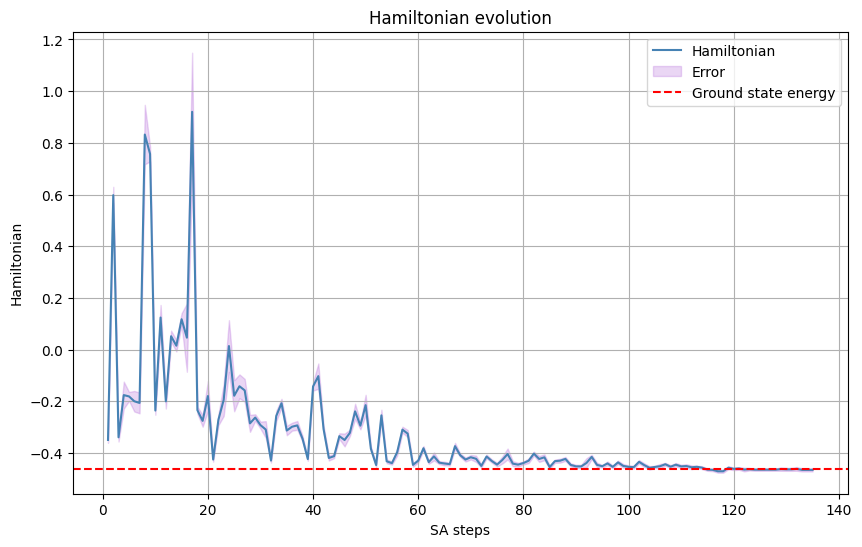

In [62]:
plt.figure(figsize=(10, 6))
n, a, err = np.loadtxt("Hamiltonian_SA.out", usecols=(0,1,2), delimiter="\t", unpack=True)

plt.plot(n, a, color='steelblue', label='Hamiltonian')
plt.fill_between(n, a-err, a+err, color='darkorchid', alpha=0.2, label='Error')

plt.axhline(y=-0.46046587969259045, color='red', linestyle='--', label='Ground state energy')

plt.xlabel('SA steps')
plt.ylabel('Hamiltonian')
plt.title('Hamiltonian evolution')

plt.legend()
plt.grid(True)
plt.show()

### 8.2.2 trajectory of the SA algorithm of $\sigma$ $\mu$

The graph below shows the evolution of $\sigma$ and $\mu$ over time. The red point represents the starting point, and the green point represents the ending point.
The color scale shows the temporal behaviour of the trajectory. Strating with the lighter lines and ending with the violet ones.
The parameters steps are read from the file Parameters.out.

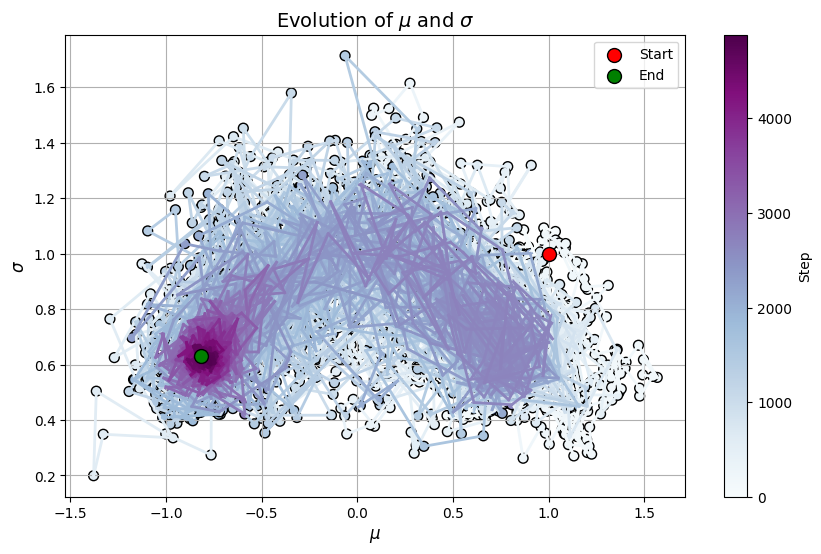

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Load data from file
data = np.loadtxt('Parameters.out')
mu = data[:, 0]
sigma = data[:, 1]

# Create a colormap for the steps
steps = np.arange(len(mu))  # Array of steps
norm = Normalize(vmin=steps.min(), vmax=steps.max())  # Normalize steps
cmap = plt.get_cmap('BuPu')  # Choose a colormap
colors = cmap(norm(steps))

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the graph
for i in range(len(mu) - 1):
    ax.plot(mu[i:i+2], sigma[i:i+2], color=colors[i], linewidth=2)

# Add scatter points with the same color
sc = ax.scatter(mu, sigma, c=steps, cmap=cmap, edgecolor='k', s=50)

# Mark the start and end points
ax.scatter(mu[0], sigma[0], color='red', edgecolor='k', s=100, label='Start', zorder=5)
ax.scatter(mu[-1], sigma[-1], color='green', edgecolor='k', s=100, label='End', zorder=5)

# Add labels and title
ax.set_xlabel('$\\mu$', fontsize=12)
ax.set_ylabel('$\\sigma$', fontsize=12)
ax.set_title('Evolution of $\\mu$ and $\\sigma$', fontsize=14)
ax.grid(True)
ax.legend()

# Add colorbar explicitly associated with the scatter
cbar = fig.colorbar(sc, ax=ax, orientation='vertical', label='Step')

# Show the graph
plt.show()


### 8.2.3 $\langle {\hat H} \rangle_T$ as functions of blocks

The following graph shows the behavior of $H$ as a function of the number of blocks for the values of $\sigma = 0.630489$ and $\mu = -0.814163	$ estimated using the SA algorithm. 


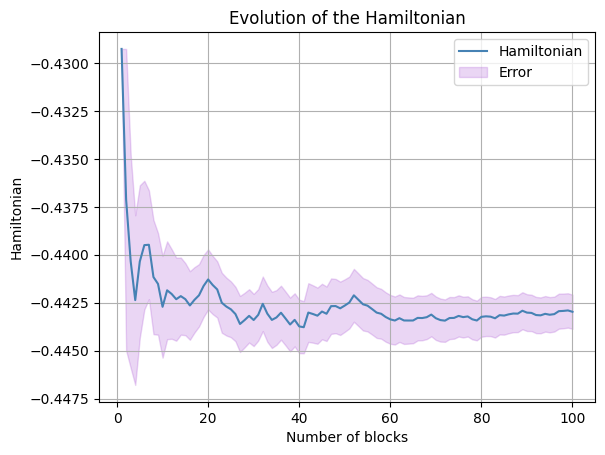

In [73]:
n, a, err = np.loadtxt("Hamiltonian.out", usecols=(0,1,2), delimiter="\t", unpack=True)

plt.plot(n, a, color='steelblue', label='Hamiltonian')
plt.fill_between(n, a-err, a+err, color='darkorchid', alpha=0.2, label='Error')

plt.xlabel('Number of blocks')
plt.ylabel('Hamiltonian')
plt.title('Evolution of the Hamiltonian')
plt.legend()
plt.grid(True)

plt.show()

### 8.2.4 $|\Psi_T(x)|^2$ histogram

In the figure below, we can observe the wave function curve with parameters optimized using variational quantum Monte Carlo techniques and a histogram of positions sampled using the Metropolis algorithm. Note that the result obtained with Metropolis is quite faithful to $\Psi_T(x)$

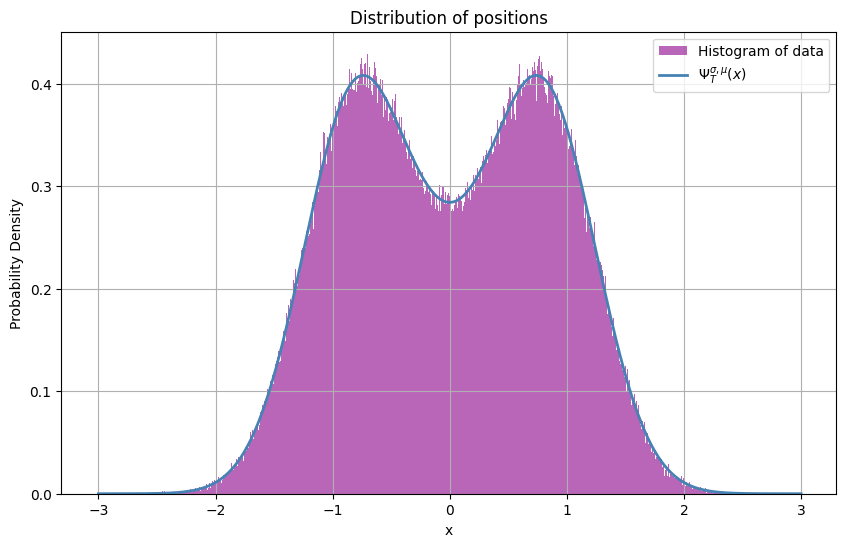

In [74]:
def Vpot(x):
    return (x**2 - 2.5)*x**2

def psi_T(x, sigma, mu):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) + np.exp(-((x + mu) ** 2) / (2 * sigma ** 2))

def leggi_dati_da_file(nome_file):
    with open(nome_file, 'r') as file:
        dati = [float(line.strip()) for line in file]
    return dati

# Load data
datas = leggi_dati_da_file("./Positions.out")

# Parameters
sigma = 0.630489
mu = -0.814163

# Generate x values and calculate psi
x = np.linspace(-3, 3, 1000)
psi_values = psi_T(x, sigma, mu)
psi_values_normalized = psi_values / np.sqrt(np.trapz(psi_values**2, x))

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(datas, bins=1000, density=True, alpha=0.6, color='darkmagenta', label='Histogram of data')
plt.plot(x, psi_values_normalized**2, label=r'$\Psi_T^{\sigma,\mu}(x)$', color='steelblue', linewidth=2)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Distribution of positions')
plt.legend()
plt.grid(True)
plt.show()
